      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

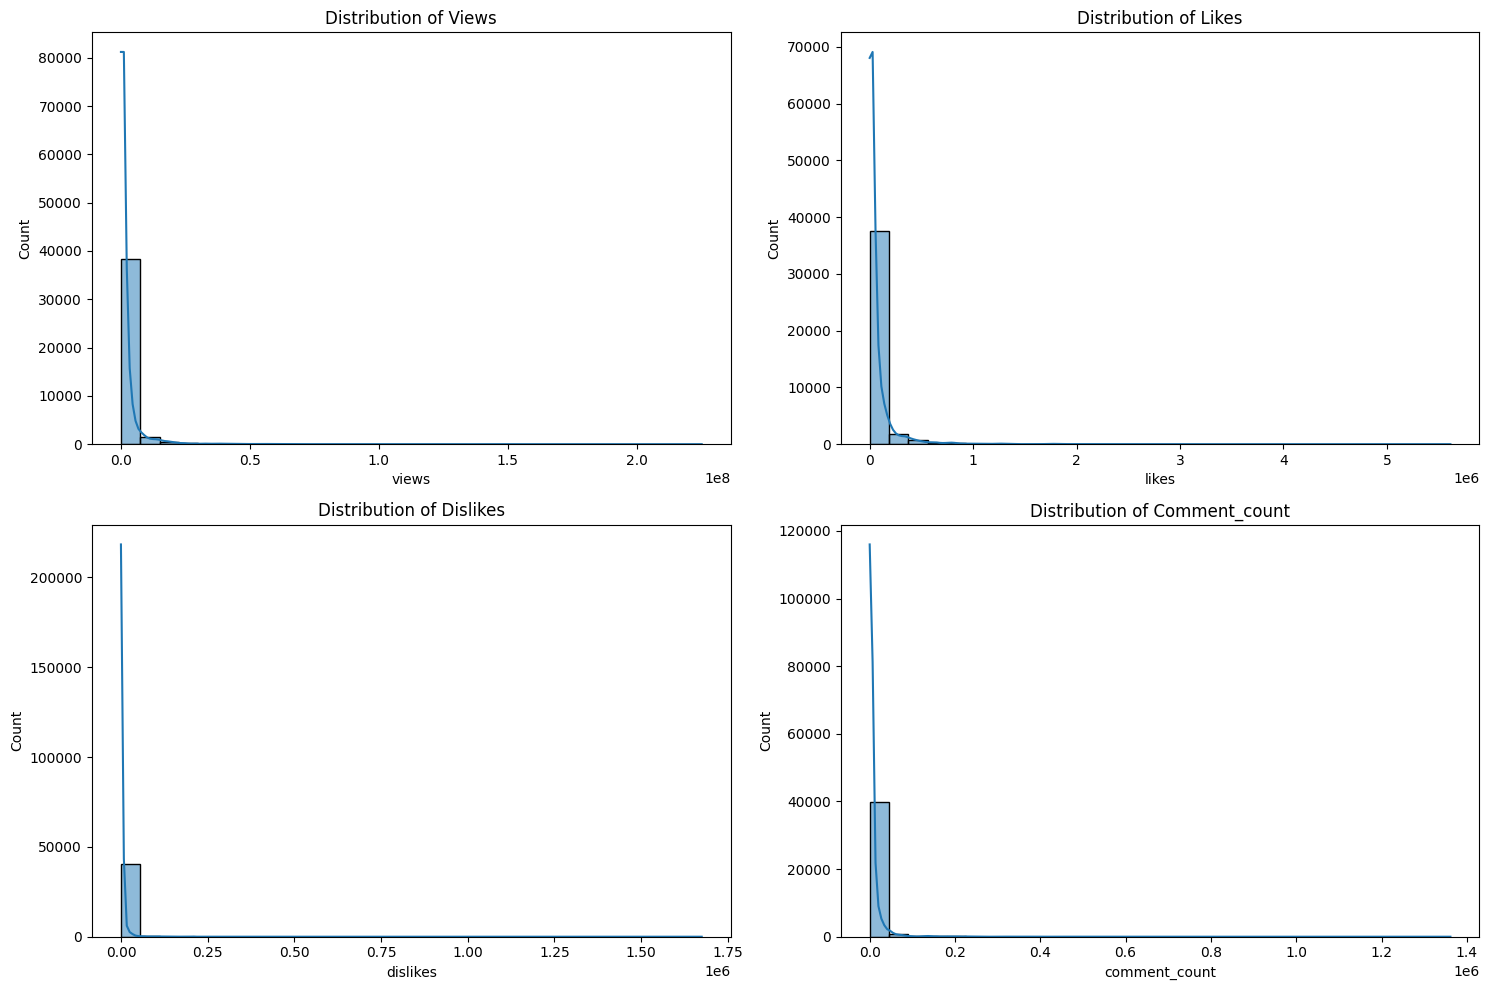

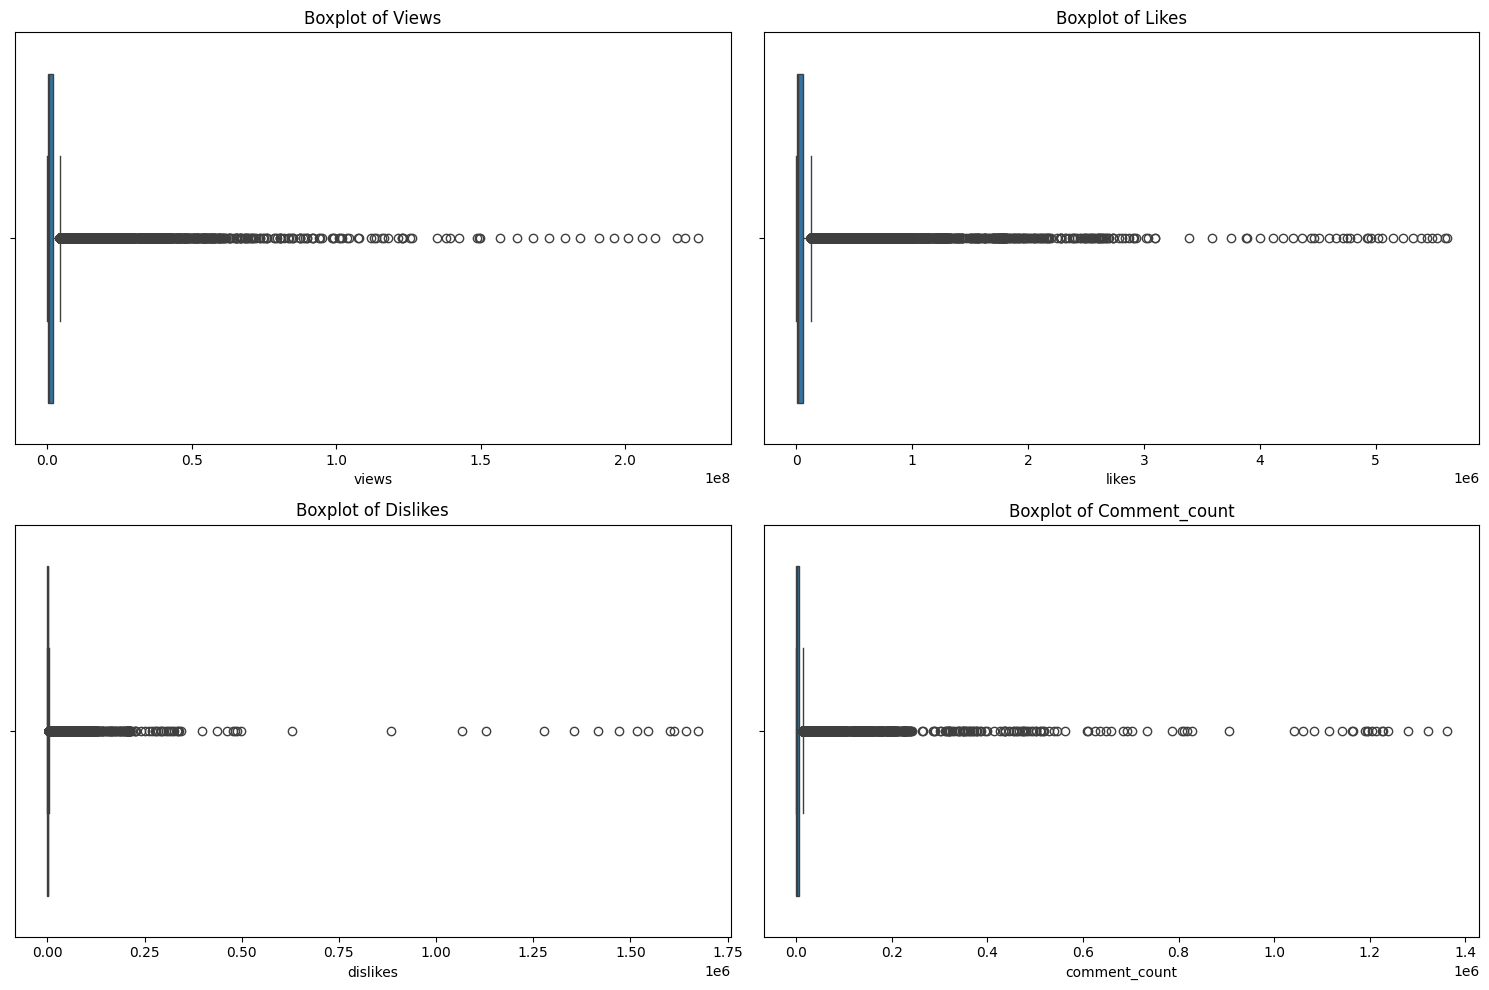

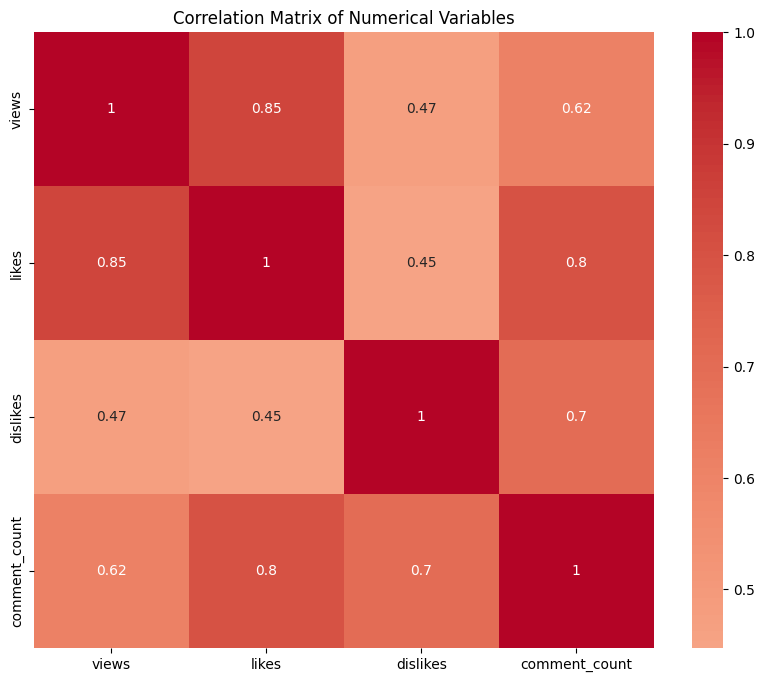

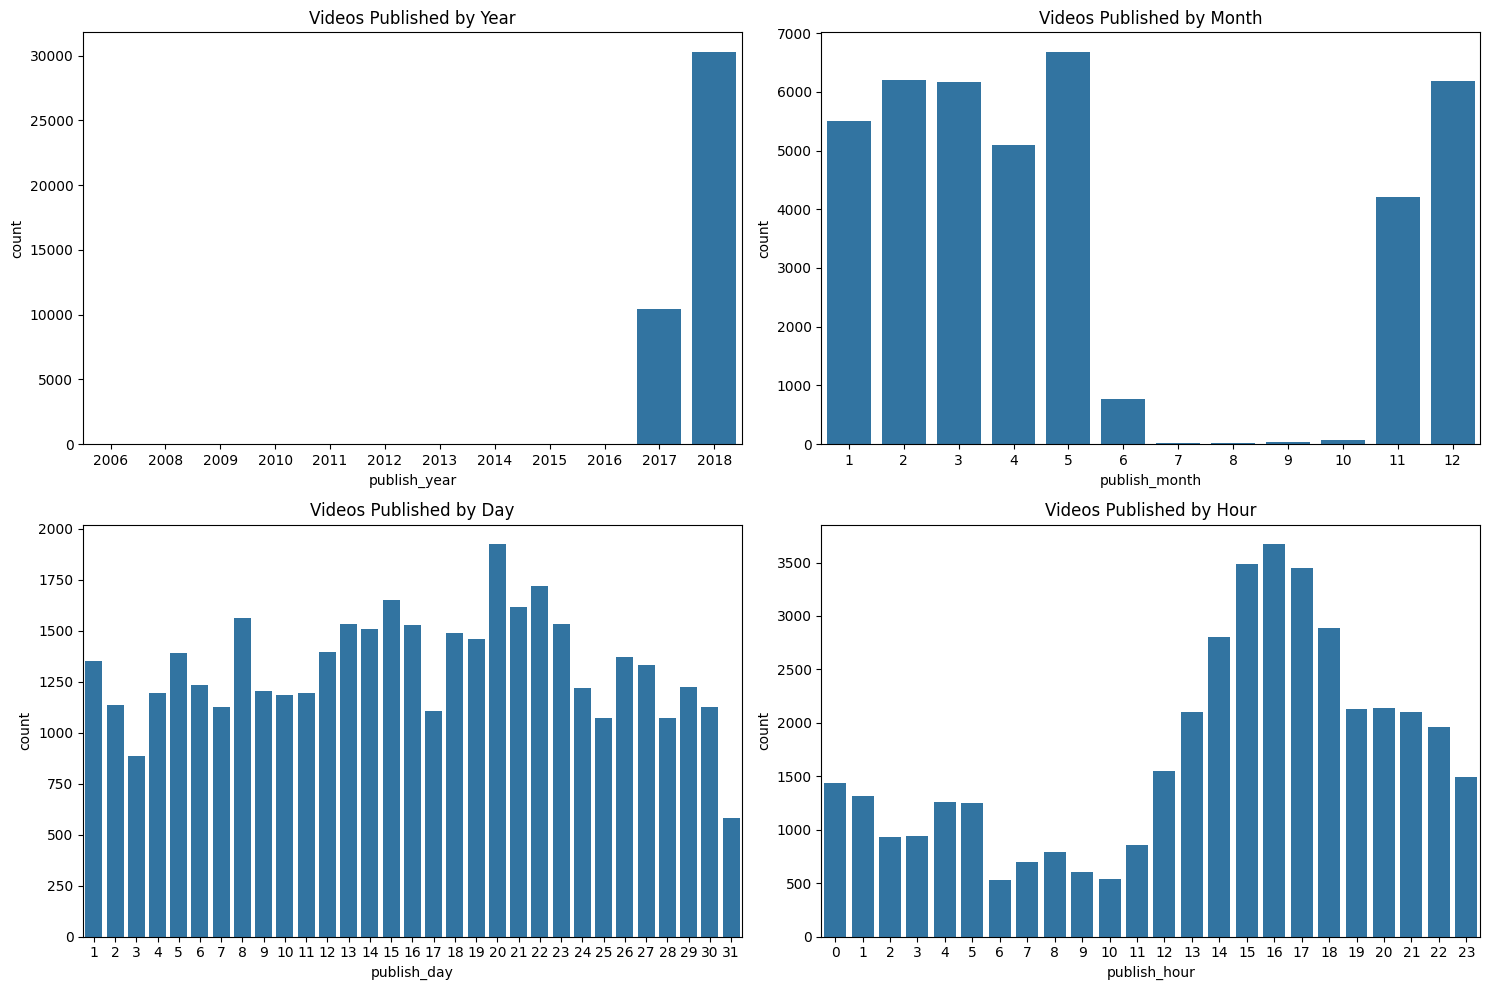

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
file_path = 'USvideos.csv'  # Update with your file path if necessary
data = pd.read_csv("C:/Users/dhruv/OneDrive/Desktop/Intership Python/Task 4/USvideos.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Convert publish_time to datetime format
data['publish_time'] = pd.to_datetime(data['publish_time'])

# Extract date parts from publish_time
data['publish_year'] = data['publish_time'].dt.year
data['publish_month'] = data['publish_time'].dt.month
data['publish_day'] = data['publish_time'].dt.day
data['publish_hour'] = data['publish_time'].dt.hour

# Define numerical columns to analyze
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']

# Distribution of numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col.capitalize()}')
plt.tight_layout()
plt.show()

# Boxplots for numerical variables to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col.capitalize()}')
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Additional datetime analysis - Distribution by publish year, month, day, hour
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(data=data, x='publish_year', ax=axs[0, 0])
sns.countplot(data=data, x='publish_month', ax=axs[0, 1])
sns.countplot(data=data, x='publish_day', ax=axs[1, 0])
sns.countplot(data=data, x='publish_hour', ax=axs[1, 1])
axs[0, 0].set_title('Videos Published by Year')
axs[0, 1].set_title('Videos Published by Month')
axs[1, 0].set_title('Videos Published by Day')
axs[1, 1].set_title('Videos Published by Hour')
plt.tight_layout()
plt.show()
